# Car Accidents Italy

Notebook for data analysis for car accidents in Italy.

**note** 
- Il dataset che avevamo trovato era delle _tabelle_, ovvero dei dati già analizzati. Si mostra quindi con dei metadati.
- Il dataset è troppo pesante per GitHub. È stato quindi messo in `.gitignore`.

**cose da fare**
- Calcolare indici di eterogeneità di Gini
- Controllare se sotto Natale ci sono più incidenti
- Dimostrare che le donne **non** sono più pericolose al volante degli uomini
- Morti su tipo di incidente, anche per età. 
- Stabilire il sesso con più morti.
- Maschi, femmine che si schiantano da soli.
- Scopriamo perché in Molise ci sono così tanti incidenti.


In [2]:
dataset_proj <- read.csv("dataset/dataset progetto.csv", sep=';')

In [3]:
dataset_proj

anno,provincia,comune,giorno,organo_di_rilevazione,localizzazione_incidente,denominazione_della_strada,tronco_di_strada_o_autostrada,tipo_di_strada,pavimentazione,⋯,feriti_maschi_coinvolti_su97,feriti_femmine_coinvolti_s98,morti_entro_24_ore,morti_entro_30_giorni,feriti,descrizione_strada,Ora,chilometri,ettometrica,trimestre
<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<fct>,<fct>,<int>
17,7,30,6,2,6,27,12,2,1,⋯,0,0,0,0,6,NA,6,12,900,2
17,7,66,1,2,3,26,12,2,1,⋯,0,0,0,0,1,NA,13,0,0,3
17,7,43,3,2,6,26,12,2,1,⋯,0,0,0,0,1,NA,15,69,100,4
17,7,24,1,2,8,0,12,2,1,⋯,0,0,0,0,1,NA,17,0,0,4
17,7,65,1,2,1,0,12,2,1,⋯,0,0,0,0,1,NA,10,0,0,4
17,7,73,7,2,6,26,12,2,1,⋯,0,0,0,0,2,NA,19,0,0,3
17,7,3,5,2,1,0,12,2,1,⋯,0,0,0,0,1,NA,15,0,0,1
17,7,65,4,2,1,0,12,2,1,⋯,0,0,0,0,1,NA,20,0,0,2
17,7,3,5,2,1,0,12,1,1,⋯,0,0,0,0,1,NA,16,0,0,2


In [4]:
cat("Grandezza del dataset:",ncol(dataset_proj),"x",nrow(dataset_proj))

Grandezza del dataset: 117 x 174933

Andiamo a prendere un campione di dal dataset che viene fornito. Per modificare la grandezza del campione, si cambi `SAMPLE_SIZE`.

In [5]:
SAMPLE_SIZE = 20000

In [6]:
sample_rows <- sample(nrow(dataset_proj), SAMPLE_SIZE)

In [7]:
sample_data = dataset_proj[sample_rows,]

In [8]:
names(sample_data)

[1] "anno"                          "provincia"                    
  [3] "comune"                        "giorno"                       
  [5] "organo_di_rilevazione"         "localizzazione_incidente"     
  [7] "denominazione_della_strada"    "tronco_di_strada_o_autostrada"
  [9] "tipo_di_strada"                "pavimentazione"               
 [11] "intersezione_o_non_interse3"   "fondo_stradale"               
 [13] "segnaletica"                   "condizioni_meteorologiche"    
 [15] "natura_incidente"              "tipo_veicolo_a"               
 [17] "tipo_veicoli__b_"              "tipo_veicolo__c_"             
 [19] "veicolo__a____circostanze_10"  "veicolo__a____circostanze_11" 
 [21] "veicolo__b____circostanze_13"  "veicolo__b____circostanze_14" 
 [23] "veicolo__a___anno_immatric18"  "immatricolazione_veicolo__b_" 
 [25] "immatricolazione_veicolo__c_"  "veicolo__a___et__conducente"  
 [27] "veicolo__a___sesso_conducente" "veicolo__a___esito_conducente"
 [29] "veicolo__a___patente_condu29"  "veicolo__a___anno_rilascio30" 
 [31] "veicolo__a___passeggeri_an35"  "veicolo__a___et__passegger36" 
 [33] "veicolo__a___sesso_passegg37"  "veicolo__a___esito_passegg38" 
 [35] "veicolo__a___et__passegger39"  "veicolo__a___sesso_passegg40" 
 [37] "veicolo__a___esito_passegg41"  "veicolo__a___et__passegger42" 
 [39] "veicolo__a___sesso_passegg43"  "veicolo__a___esito_passegg44" 
 [41] "veicolo__a___et__passegger45"  "veicolo__a___sesso_passegg46" 
 [43] "veicolo__a___altri_passegg47"  "veicolo__a___altri_passegg48" 
 [45] "veicolo__a___altri_passegg49"  "veicolo__a___altri_passegg50" 
 [47] "veicolo__b___et__conducente"   "veicolo__b___sesso_conducente"
 [49] "veicolo__b___esito_conducente" "veicolo__b___patente_condu51" 
 [51] "veicolo__b___anno_rilascio52"  "veicolo__b___passeggeri_an57" 
 [53] "veicolo__b___et__passegger58"  "veicolo__b___sesso_passegg59" 
 [55] "veicolo__b___esito_passegg60"  "veicolo__b___et__passegger61" 
 [57] "veicolo__b___sesso_passegg62"  "veicolo__b___esito_passegg63" 
 [59] "veicolo__b___et__passegger64"  "veicolo__b___sesso_passegg65" 
 [61] "veicolo__b___esito_passegg66"  "veicolo__b___et__passegger67" 
 [63] "veicolo__b___sesso_passegg68"  "veicolo__b___altri_passegg69" 
 [65] "veicolo__b___altri_passegg70"  "veicolo__b___altri_passegg71" 
 [67] "veicolo__b___altri_passegg72"  "veicolo__c___et__conducente"  
 [69] "veicolo__c___sesso_conducente" "veicolo__c___esito_conducente"
 [71] "veicolo__c___patente_condu73"  "veicolo__c___anno_rilascio74" 
 [73] "veicolo__c___passeggeri_an79"  "veicolo__c___et__passegger80" 
 [75] "veicolo__c___sesso_passegg81"  "veicolo__c___esito_passegg82" 
 [77] "veicolo__c___et__passegger83"  "veicolo__c___sesso_passegg84" 
 [79] "veicolo__c___esito_passegg85"  "veicolo__c___et__passegger86" 
 [81] "veicolo__c___sesso_passegg87"  "veicolo__c___esito_passegg88" 
 [83] "veicolo__c___et__passegger89"  "veicolo__c___sesso_passegg90" 
 [85] "veicolo__c___altri_passegg91"  "veicolo__c___altri_passegg92" 
 [87] "veicolo__c___altri_passegg93"  "veicolo__c___altri_passegg94" 
 [89] "pedone_morto_1__sesso"         "pedone_morto_1__et_"          
 [91] "pedone_ferito_1__sesso"        "pedone_ferito_1__et_"         
 [93] "pedone_morto_2__sesso"         "pedone_morto_2__et_"          
 [95] "pedone_ferito_2__sesso"        "pedone_ferito_2__et_"         
 [97] "pedone_morto_3__sesso"         "pedone_morto_3__et_"          
 [99] "pedone_ferito_3__sesso"        "pedone_ferito_3__et_"         
[101] "pedone_morto_4__sesso"         "pedone_morto_4__et_"          
[103] "pedone_ferito_4__sesso"        "pedone_ferito_4__et_"         
[105] "altri_veicoli_coinvolti"       "morti_maschi_coinvolti_su_95" 
[107] "morti_femmine_coinvolti_su96"  "feriti_maschi_coinvolti_su97" 
[109] "feriti_femmine_coinvolti_s98"  "morti_entro_24_ore"           
[111] "morti_entro_30_giorni"         "feriti"                       
[113] "descrizione_strada"            "Ora"                          
[115] "chilo

In [9]:
attach(sample_data)

In [10]:
giorno <- factor(giorno)
levels(giorno) <- c("Lun", "Mar", "Mer", "Gio", "Ven", "Sab", "Dom")
incidenti_per_giorni = table(giorno)

In [11]:
levels(giorno)

[1] "Lun" "Mar" "Mer" "Gio" "Ven" "Sab" "Dom"

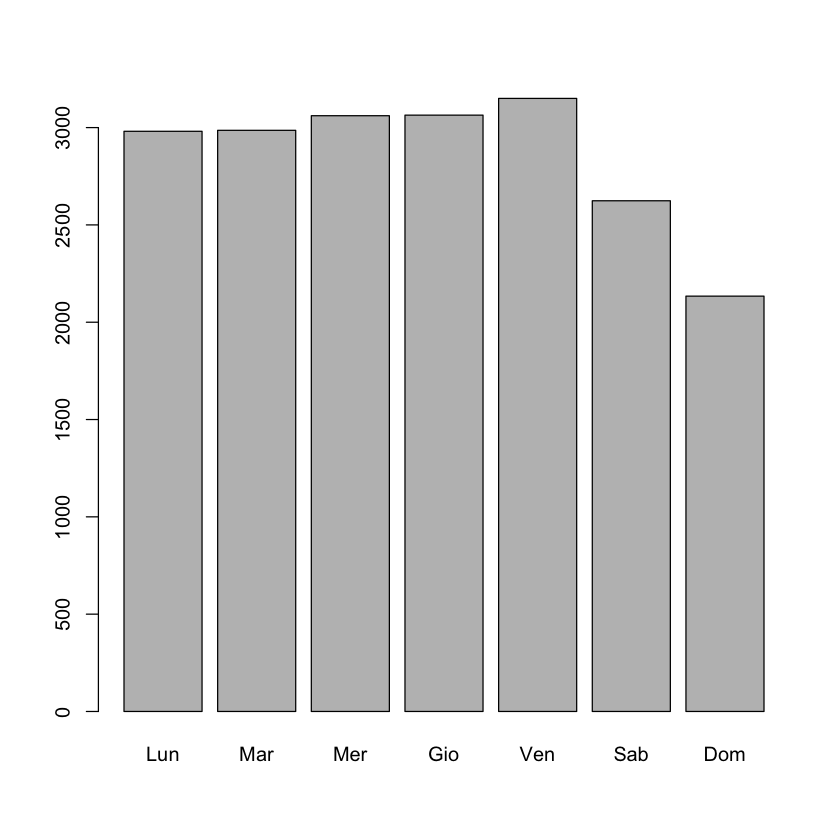

In [12]:
barplot(incidenti_per_giorni)

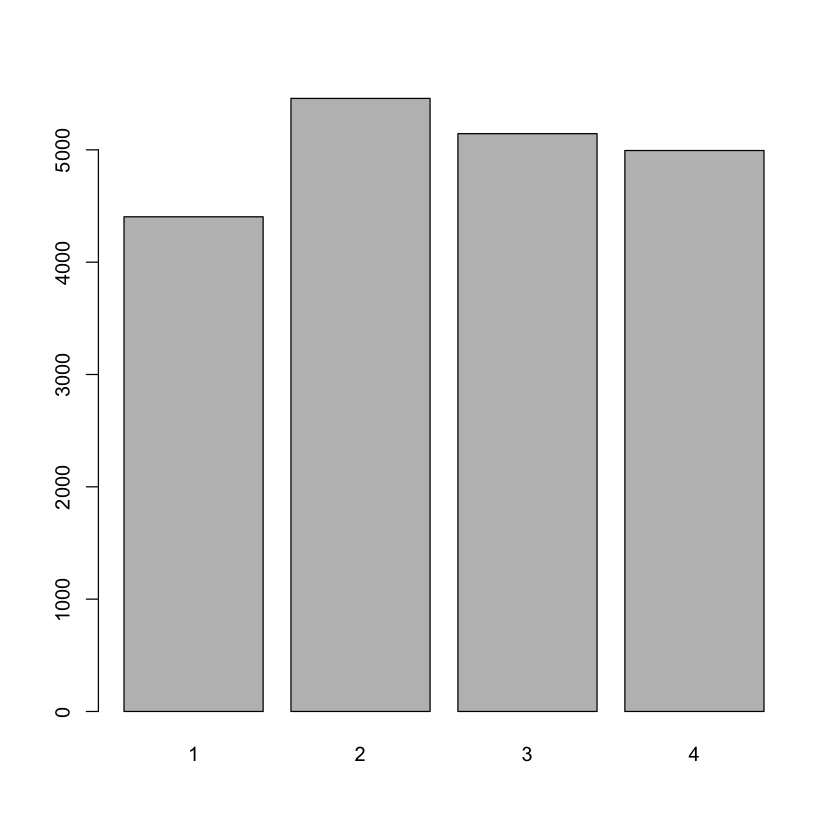

In [13]:
barplot(table(trimestre))

-----

Provo a creare una qualche tabella bivariata.

In [14]:
pavimentazione <- factor(pavimentazione)
levels(pavimentazione) <- c("good", "bad", "non-pav")

Provo a fare una nuova variabile per la localizzazione degli incidenti, nella quale distinguo solamente tra _urbana_, _extraurbana_ e _autostrada_. In questo modo si dovrebbe vedere meglio dove si ha una maggiore incidenza del fondo stradale messo male.

In [15]:
new_localizzazione_incidente = array(10, length(localizzazione_incidente))

In [16]:
for(i in 1:length(localizzazione_incidente))
{

    if(localizzazione_incidente[i] == 0 || localizzazione_incidente[i] == 1 || localizzazione_incidente[i] == 2 || localizzazione_incidente[i] == 3)    
    {
        new_localizzazione_incidente[i] = 0

    }
    if(localizzazione_incidente[i] == 4 || localizzazione_incidente[i] == 5 || localizzazione_incidente[i] == 6 || localizzazione_incidente[i] == 9)    
    {
        new_localizzazione_incidente[i] = 1
    }
    if(localizzazione_incidente[i] == 7)
    {
        new_localizzazione_incidente[i] = 2
    }
    
}

Controllo che effettivamente il numero di strade scartate coincida con quelle non considerate (ovvero `altro`).

In [17]:
length(which(new_localizzazione_incidente == 10)) == length(which(localizzazione_incidente==8))

[1] TRUE

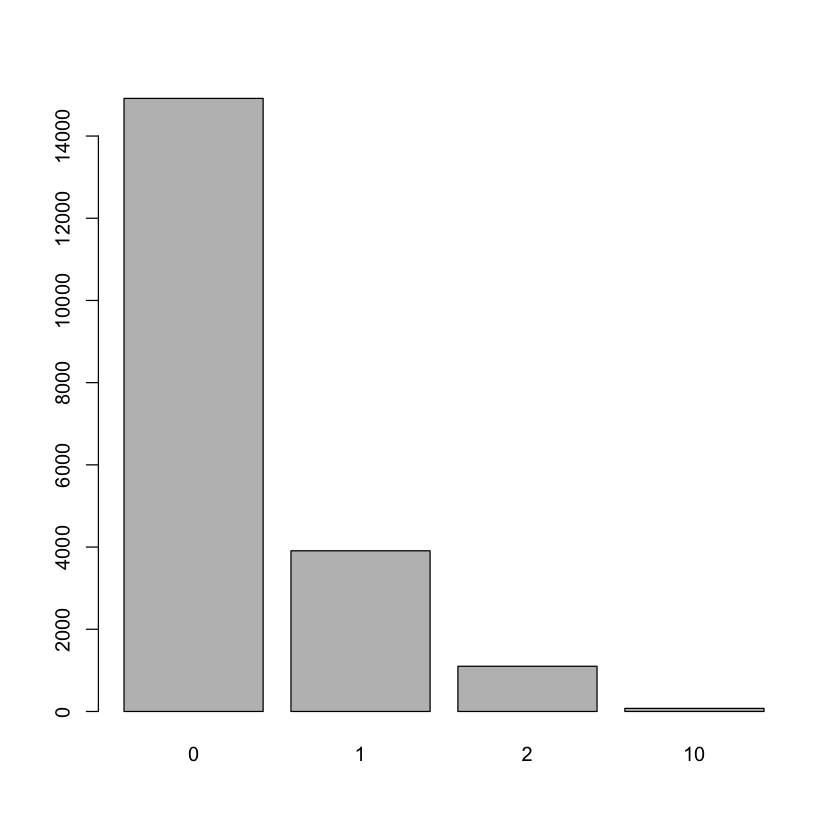

In [18]:
barplot(table(new_localizzazione_incidente))

In [19]:
tabella_pav_tipo_strada <- table(pavimentazione, new_localizzazione_incidente)
tabella_pav_tipo_strada

              new_localizzazione_incidente
pavimentazione     0     1     2    10
       good    14817  3872  1100    67
       bad        71    25     0     5
       non-pav    28    12     0     3

In [20]:
table(pavimentazione)

pavimentazione
   good     bad non-pav 
  19856     101      43 

**Considerazioni**: il numero di strade segnate come sdrucciolevoli è talmente basso da non rendere possibile un'analisi. Mi sembra comunque strano che sia così basso - bisognerebbe guardare esattamente alla definizione.

In [21]:
new_localizzazione_incidente <- factor(new_localizzazione_incidente)
levels(new_localizzazione_incidente) <- c("urbana", "extraurbana", "autostrada", "altro")

In [22]:
fondo_stradale <- factor(fondo_stradale)
levels(fondo_stradale) <- c("asciutto", "bagnato", "sdrucciolevole", "ghiacciato", "innevato")

In [23]:
tabella_fondo_tipo_strada <- table(fondo_stradale, new_localizzazione_incidente)
tabella_fondo_tipo_strada

                new_localizzazione_incidente
fondo_stradale   urbana extraurbana autostrada altro
  asciutto        13126        3203        921    60
  bagnato          1612         614        158    13
  sdrucciolevole    114          36          5     1
  ghiacciato         46          40          9     0
  innevato           18          16          7     1

In [24]:
tot_incidenti_urbani = sum(tabella_fondo_tipo_strada[,1])
tot_incidenti_extra_urbani = sum(tabella_fondo_tipo_strada[,2])
tot_incidenti_autostrada = sum(tabella_fondo_tipo_strada[,3])

In [25]:
prob_incidente = array(666, dim=c(nrow(tabella_fondo_tipo_strada), ncol(tabella_fondo_tipo_strada),3))

In [26]:
prob_incidente_per_acqua_urbano = tabella_fondo_tipo_strada[2]/tot_incidenti_urbani
cat("Probabilità incidente per fondo bagnato in strada urbana", as.integer(prob_incidente_per_acqua_urbano*10000)/100, "%\n")

prob_incidente_per_ghiacciato_urbano = tabella_fondo_tipo_strada[4]/tot_incidenti_urbani
cat("Probabilità incidente per fondo ghiacciato in strada urbana", as.integer(prob_incidente_per_ghiacciato_urbano*10000)/100, "%")

Probabilità incidente per fondo bagnato in strada urbana 10.8 %
Probabilità incidente per fondo ghiacciato in strada urbana 0.3 %

In [27]:
prob_incidente_per_acqua_extra_urbano = tabella_fondo_tipo_strada[2,2]/tot_incidenti_extra_urbani
cat("Probabilità incidente per fondo bagnato in strada extra urbana", as.integer(prob_incidente_per_acqua_extra_urbano*10000)/100, "%\n")

prob_incidente_per_ghiacciato_extra_urbano = tabella_fondo_tipo_strada[4,2]/tot_incidenti_extra_urbani
cat("Probabilità incidente per fondo ghiacciato in strada extra urbana", as.integer(prob_incidente_per_ghiacciato_extra_urbano*10000)/100, "%")

Probabilità incidente per fondo bagnato in strada extra urbana 15.7 %
Probabilità incidente per fondo ghiacciato in strada extra urbana 1.02 %

Quello che si dovrebbe ora calcolare è di andare a vedere se effettivamente questi due fenomeno sono dovuti abbastanza diversi. Ovvero devo fare un qualche test di confronto, e.g. chi-quadro. 

Ci ritorno quando sarò in grado di farlo.

Sarebbe carino mettere un plot in 3 dimensioni per mostrare le tabelle bivariate che sono state prodotte sopra.

Calcolo gli intervalli di confidenza per le probabilità calcolate sopra.

---- 
### Confidence Intervals

Con un confidence level del 95%, l'intervallo di probabilità per i vari tipi di incidente è

In [28]:
confidence_level = 0.99

In [29]:
confidence_interval_acqua_urbano =  qnorm(confidence_level+(1-confidence_level)/2) * sqrt(prob_incidente_per_acqua_urbano*(1-prob_incidente_per_acqua_urbano)/SAMPLE_SIZE)

cat("Intervallo di confidenza al", confidence_level*100,"% per incidenti su fondo bagnato in strada urbana:(", 
      as.integer(prob_incidente_per_acqua_urbano*10000)/100,"±",
        as.integer(confidence_interval_acqua_urbano*10000)/100,")%")

Intervallo di confidenza al 99 % per incidenti su fondo bagnato in strada urbana:( 10.8 ± 0.56 )%

**Nota importante** La funzione `qnorm` rimanda solamente l'inverso dell'integrale sotto la Gaussiana (ovvero il valore $Z$ associato a un certo quantile) per una coda. Ovvero, per avere uno $Z$ associato a un calcolo di intervallo, come quello che dobbiamo fare, dobbiamo fare considerazioni algebriche.

In particolare, se noi vogliamo il 95% su due cose, su una coda questo corrisponde a richiedere il 97.5% (infatti, le due code sono entrambe del 2.5%; ovvero aggiungo questo valore per vedere dove arrivo a "destra").

-----
### Analisi autostradale

Per prima cosa vado a selezionare, all'interno del mio campione, solamente i dati relativi ad autostrada.

**nota**: Tra le autostrade, configurano anche delle denominazioni tipo `R03`: sono riferiti a dei pezzi di raccordo. Cercando velocemente online si chiarisce facilmente.

La funzione `droplevels` serve per escludere tutti i livelli non utilizzati, i.e. i nomi delle strade normali.

In [30]:
incidenti_in_autostrada = sample_data[which(new_localizzazione_incidente=="autostrada"),]

In [31]:
tabella_incidenti_in_autostrada = table(droplevels(incidenti_in_autostrada$denominazione_della_strada))

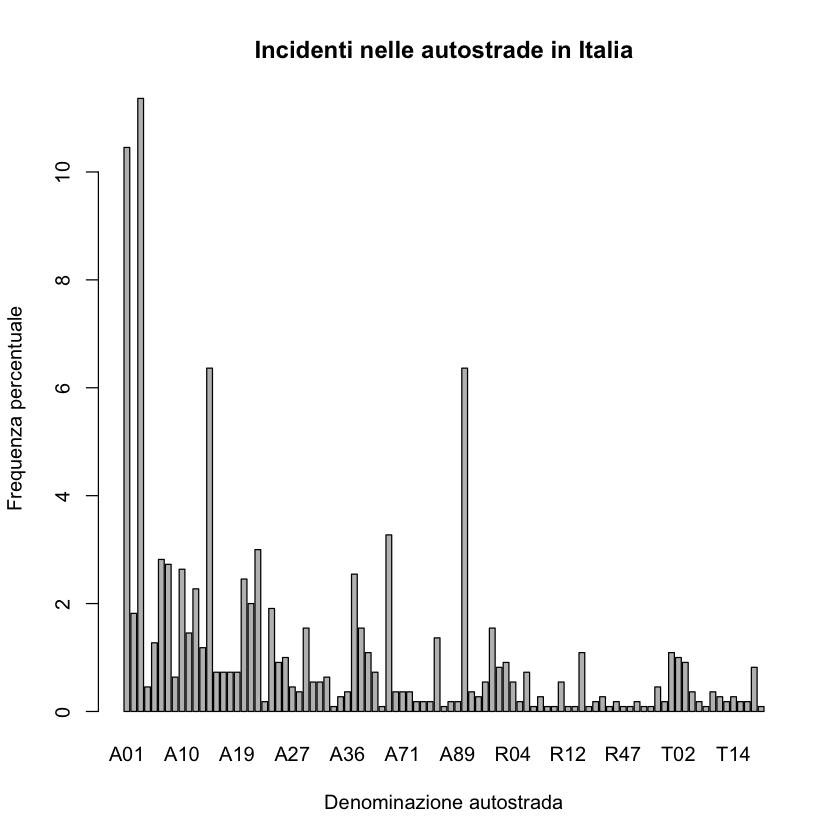

In [32]:
barplot(tabella_incidenti_in_autostrada/nrow(incidenti_in_autostrada)*100, ylab='Frequenza percentuale', xlab='Denominazione autostrada', 
        main='Incidenti nelle autostrade in Italia')

**Moda** degli incidenti in autostrada.

In [33]:
tabella_incidenti_in_autostrada.percfreq = tabella_incidenti_in_autostrada/nrow(incidenti_in_autostrada)*100
tabella_incidenti_in_autostrada.mode = which(tabella_incidenti_in_autostrada.percfreq==max(tabella_incidenti_in_autostrada.percfreq))

In [34]:
cat("L'autostrada con più incidenti in Italia nel 2017 è la", names(tabella_incidenti_in_autostrada.mode))

L'autostrada con più incidenti in Italia nel 2017 è la A04

In [35]:
library('rgdal')

Loading required package: sp
rgdal: version: 1.4-7, (SVN revision 845)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.4.2, released 2019/06/28
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.6/Resources/library/rgdal/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 5.2.0, September 15th, 2018, [PJ_VERSION: 520]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.6/Resources/library/rgdal/proj
 Linking to sp version: 1.3-1 


Sono riuscito a trovare come poter collegare il nome dell'autostrada. Online sono inoltre presenti i dati geografici (si chiamano _shapefile_) relativi alle autostrade. Penso che, una volta capito quello che si deve fare, non sia difficile riportare questi dati su una mappa geografica.

Servono ovviamente le apposite mappe.

### Sesso nel numero di incidenti.

Provo a fare una veloce analisi per vedere se ci sono più incidenti quando sono presenti donne o meno.

In [39]:
# Sostituisco i Nan con dei 3
veicolo__a___sesso_conducente[is.na(veicolo__a___sesso_conducente)] <- 3

In [40]:
veicolo__a___sesso_conducente <- factor(veicolo__a___sesso_conducente)
levels(veicolo__a___sesso_conducente) <- c("Maschio", "Femmina","Sconosciuto")

In [41]:
tabella_veicolo__a__sesso_conducente = table(veicolo__a___sesso_conducente)
tabella_veicolo__a__sesso_conducente

veicolo__a___sesso_conducente
    Maschio     Femmina Sconosciuto 
      14605        5272         123 

In [42]:
# Calcolo frequenze
tabella_veicolo__a__sesso_conducente.relfreq <- tabella_veicolo__a__sesso_conducente/length(veicolo__a___sesso_conducente)
tabella_veicolo__a__sesso_conducente.percfreq <- tabella_veicolo__a__sesso_conducente.relfreq*100

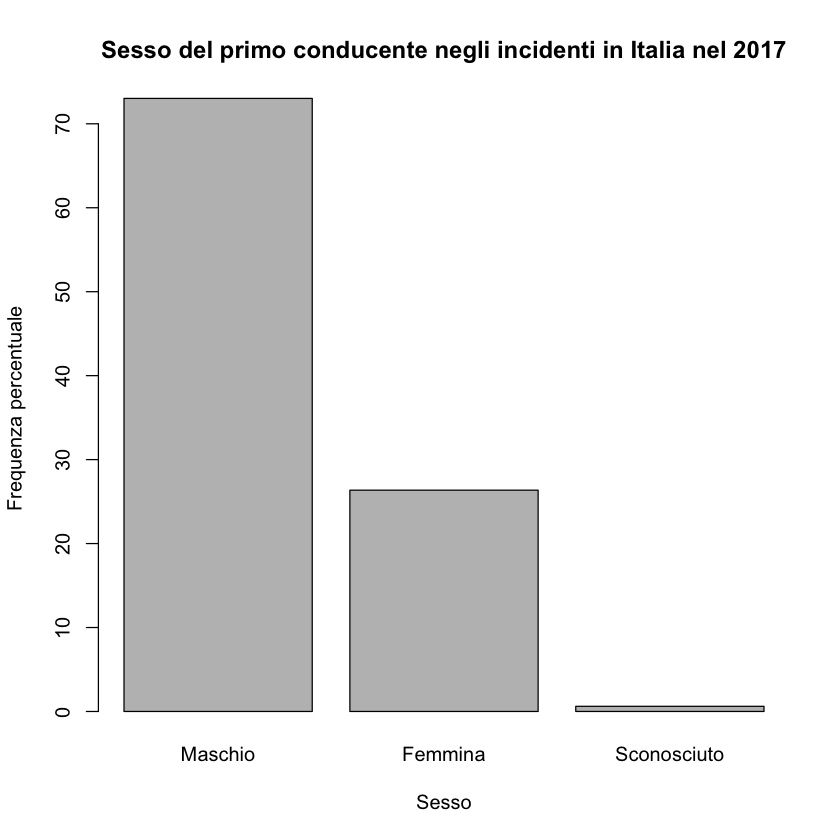

In [43]:
barplot(tabella_veicolo__a__sesso_conducente.percfreq, xlab='Sesso', ylab='Frequenza percentuale', main='Sesso del primo conducente negli incidenti in Italia nel 2017')

In [44]:
# Sostituisco i Nan con dei 3
veicolo__b___sesso_conducente[is.na(veicolo__b___sesso_conducente)] <- 3

In [45]:
veicolo__b___sesso_conducente <- factor(veicolo__b___sesso_conducente)
levels(veicolo__b___sesso_conducente) <- c("Maschio", "Femmina", "Sconosciuto")

In [46]:
tabella_veicolo__b__sesso_conducente = table(veicolo__b___sesso_conducente)
tabella_veicolo__b__sesso_conducente

veicolo__b___sesso_conducente
    Maschio     Femmina Sconosciuto 
      10657        3616        5727 

In [47]:
# Calcolo frequenze
tabella_veicolo__b__sesso_conducente.relfreq <- tabella_veicolo__b__sesso_conducente/length(veicolo__b___sesso_conducente)
tabella_veicolo__b__sesso_conducente.percfreq <- tabella_veicolo__b__sesso_conducente.relfreq*100

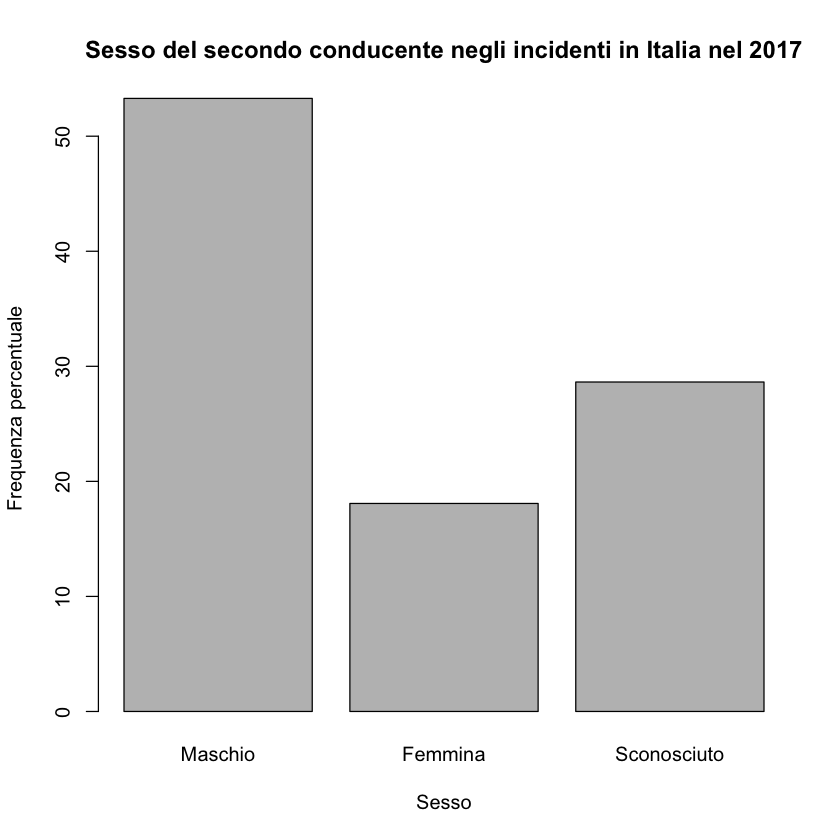

In [48]:
barplot(tabella_veicolo__b__sesso_conducente.percfreq, xlab='Sesso', ylab='Frequenza percentuale',
        main='Sesso del secondo conducente negli incidenti in Italia nel 2017')

Vado a prendere tutti quegli incidenti in cui si ha che è presente una donna come conducente, o sul primo o sul secondo veicolo.

In [49]:
incidenti_con_almeno_una_donna = sample_data[which(veicolo__a___sesso_conducente=="Femmina" | veicolo__b___sesso_conducente=="Femmina"),]

In [50]:
nrow(incidenti_con_almeno_una_donna)

[1] 7751

In [51]:
incidenti_con_almeno_un_uomo = sample_data[which(veicolo__a___sesso_conducente=="Maschio" |  veicolo__b___sesso_conducente=="Maschio"),]

In [52]:
nrow(incidenti_con_almeno_un_uomo)

[1] 17364

-----

-----

In [53]:
incidenti_uomo_donna_confronto = as.table(c(nrow(incidenti_con_almeno_una_donna),nrow(incidenti_con_almeno_un_uomo)))
rownames(incidenti_uomo_donna_confronto) = c("Almeno una donna", "Almeno un uomo")

In [54]:
incidenti_solo_sconosciuti = sample_data[which(veicolo__a___sesso_conducente=="Sconosciuto" & veicolo__b___sesso_conducente=="Sconosciuto"),]
nrow(incidenti_solo_sconosciuti)

[1] 70

Il grafico qua sotto rappresenta la probabilità che un uomo e una donna siano coinvolti in un incidente, in generale. 

Questo risultato non è però pesato sul numero di patenti.

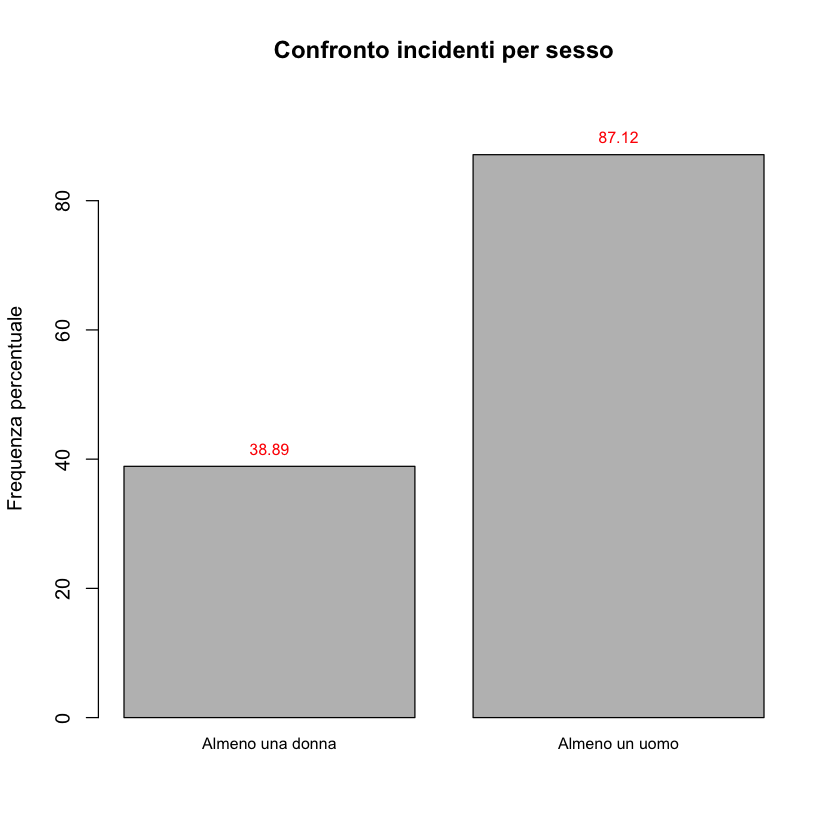

In [55]:
incidenti_uomo_donna_confronto.percfreq <- as.numeric(as.character(as.integer(incidenti_uomo_donna_confronto/(SAMPLE_SIZE - nrow(incidenti_solo_sconosciuti))*10000)/100))
ylim <- c(0, 1.1*max(incidenti_uomo_donna_confronto.percfreq))
xx <- barplot(incidenti_uomo_donna_confronto.percfreq, xaxt = 'n', xlab = '', width = 0.85, ylim = ylim,
              main = "Confronto incidenti per sesso", 
              ylab = "Frequenza percentuale")
text(x = xx, y = incidenti_uomo_donna_confronto.percfreq,
     label = incidenti_uomo_donna_confronto.percfreq,
     pos = 3, cex = 0.8, col = "red")
axis(1, at=xx, labels=c("Almeno una donna", "Almeno un uomo"), tick=FALSE, las=1, line=-0.5, cex.axis=0.8)

Da questa tabella si deduce che la probabilità che una donna sia coinvolta in un incidente è del 40%, mentre quella che un uomo ne sia coinvolto è del 90%.

Ovviamente le due probabilità non sono mutualmente esclusive: il fatto che ci sia un uomo in un incidente, non impedisce che l'altro conducente non sia donna. Ovvero ci sono una serie di incidente `uomo-donna`. 

Poiché questi risultati non sono pesati per il numero di persone, non indicano effettivamente quale tra i due sessi sia più pericoloso. Per poter avere accesso a questa informazione, bisogna pesare i risultati sul numero di patenti per sesso.

-------------

Provo a fare un rapporto tra le frequenze di queste tabelle e il numero di patentati per sesso.

Carico qua sotto le informazioni su tutte le patenti presenti in Italia, divise per regioni.

**Info** Ci mette l'eternità ad aprire tutti questi file.

In [ ]:
patenti_Abruzzo <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Abruzzo.csv", sep=',')

In [ ]:
patenti_Basilicata <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Basilicata.csv", sep=',')

In [ ]:
patenti_Calabria <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Calabria.csv", sep=',')

In [ ]:
patenti_Campania <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Campania.csv", sep=',')

In [ ]:
patenti_EmiliaRomagna <- read.csv("dataset/informazioni_patenti_per_regione/patenti_EmiliaRomagna.csv", sep=',')

In [ ]:
patenti_FriuliVeneziaGiulia <- read.csv("dataset/informazioni_patenti_per_regione/patenti_FriuliVeneziaGiulia.csv", sep=',')

In [ ]:
patenti_Lazio <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Lazio.csv", sep=',')

In [ ]:
patenti_Liguria <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Liguria.csv", sep=',')

In [ ]:
patenti_Liguria <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Liguria.csv", sep=',')

In [ ]:
patenti_Lombardia <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Lombardia.csv", sep=',')

In [ ]:
patenti_Marche <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Marche.csv", sep=',')

In [ ]:
patenti_Molise <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Molise.csv", sep=',')

In [ ]:
patenti_Piemonte <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Piemonte.csv", sep=',')

In [ ]:
patenti_Puglia <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Puglia.csv", sep=',') 

In [ ]:
patenti_Sardegna <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Sardegna.csv", sep=',') 

In [ ]:
patenti_Sicilia <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Sicilia.csv", sep=',') 

In [ ]:
patenti_Toscana <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Toscana.csv", sep=',') 

In [ ]:
patenti_TrentinoAltoAdige <- read.csv("dataset/informazioni_patenti_per_regione/patenti_TrentinoAltoAdige.csv", sep=',') 

In [ ]:
patenti_Umbria <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Umbria.csv", sep=',') 

In [ ]:
patenti_ValleAosta <- read.csv("dataset/informazioni_patenti_per_regione/patenti_ValleAosta.csv", sep=',') 

In [ ]:
patenti_Veneto <- read.csv("dataset/informazioni_patenti_per_regione/patenti_Veneto.csv", sep=',') 

In [ ]:
patenti_femmine = length(which(patenti_Abruzzo$sesso=="F")) + length(which(patenti_Basilicata$sesso=="F")) + length(which(patenti_Calabria$sesso=="F")) + length(which(patenti_Campania$sesso=="F")) + length(which(patenti_EmiliaRomagna$sesso=="F")) + length(which(patenti_FriuliVeneziaGiulia$sesso=="F")) + length(which(patenti_Lazio$sesso=="F")) + length(which(patenti_Liguria$sesso=="F")) + length(which(patenti_Lombardia$sesso=="F")) + length(which(patenti_Marche$sesso=="F")) + length(which(patenti_Molise$sesso=="F")) + length(which(patenti_Piemonte$sesso=="F")) + length(which(patenti_Puglia$sesso=="F")) + length(which(patenti_Sardegna$sesso=="F")) + length(which(patenti_Sicilia$sesso=="F")) + length(which(patenti_Toscana$sesso=="F")) + length(which(patenti_TrentinoAltoAdige$sesso=="F")) + length(which(patenti_Umbria$sesso=="F")) + length(which(patenti_ValleAosta$sesso=="F")) + length(which(patenti_Veneto$sesso=="F"))
patenti_femmine 

In [ ]:
patenti_maschi = length(which(patenti_Abruzzo$sesso=="M")) + length(which(patenti_Basilicata$sesso=="M")) + length(which(patenti_Calabria$sesso=="M")) + length(which(patenti_Campania$sesso=="M")) + length(which(patenti_EmiliaRomagna$sesso=="M")) + length(which(patenti_FriuliVeneziaGiulia$sesso=="M")) + length(which(patenti_Lazio$sesso=="M")) + length(which(patenti_Liguria$sesso=="M")) + length(which(patenti_Lombardia$sesso=="M")) + length(which(patenti_Marche$sesso=="M")) + length(which(patenti_Molise$sesso=="M")) + length(which(patenti_Piemonte$sesso=="M")) + length(which(patenti_Puglia$sesso=="M")) + length(which(patenti_Sardegna$sesso=="M")) + length(which(patenti_Sicilia$sesso=="M")) + length(which(patenti_Toscana$sesso=="M")) + length(which(patenti_TrentinoAltoAdige$sesso=="M")) + length(which(patenti_Umbria$sesso=="M")) + length(which(patenti_ValleAosta$sesso=="M")) + length(which(patenti_Veneto$sesso=="M"))
patenti_maschi

In [ ]:
tabella_patenti = as.table(c(patenti_maschi,patenti_femmine))

In [ ]:
rownames(tabella_patenti) = c("Maschi", "Femmine")

In [ ]:
tabella_patenti.percfreq <- as.numeric(as.character(as.integer(tabella_patenti/(tabella_patenti[1]+tabella_patenti[2])*10000)/100))
ylim <- c(0, 1.1*max(tabella_patenti.percfreq))
xx <- barplot(tabella_patenti.percfreq, xaxt = 'n', xlab = '', width = 0.85, ylim = ylim,
              main = "Patenti in Italia per sesso", 
              ylab = "Frequenza percentuale")
text(x = xx, y = tabella_patenti.percfreq,
     label = tabella_patenti.percfreq,
     pos = 3, cex = 0.8, col = "red")
axis(1, at=xx, labels=c("Maschi", "Femmine"), tick=FALSE, las=1, line=-0.5, cex.axis=0.8)

Non sono sicuro che l'analisi sia giusta, ma qua sotto metto il risultato del mio obiettivo, ovvero il rapporto tra gli incidenti con donne e uomini e il numero di guidatori in Italia.

In [ ]:
incidenti_femmine_pesato = nrow(incidenti_con_almeno_una_donna) / patenti_femmine 
incidenti_femmine_pesato

In [ ]:
incidenti_maschi_pesato = nrow(incidenti_con_almeno_un_uomo) / patenti_maschi 
incidenti_maschi_pesato

Voglio mostrare che vi sia indipendenza statistica o meno tra questi due risultati. 

In [ ]:
prob_incidente_femmina = incidenti_femmine_pesato / (incidenti_femmine_pesato + incidenti_maschi_pesato)
prob_incidente_femmina

In [ ]:
prob_incidente_maschio = incidenti_maschi_pesato / (incidenti_maschi_pesato + incidenti_femmine_pesato)
prob_incidente_maschio

-----

-----
-----
----

## Regioni Italiane

Provo a fare una mappa con numero di incidenti per Regione in Italia.

* Per prima cosa, trasformo i dati relativi alle province in dati relativi alle regioni.

In [56]:
incidenti_per_provincia <- provincia

In [57]:
tabella_incidenti_per_provincia <- table(incidenti_per_provincia)
tabella_incidenti_per_provincia

incidenti_per_provincia
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 625   41  109  133   49  158   30  138  139  607  108  274  187   36 1622  331 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 369  179  115  135  184  164  362  269   49  262  275  326   73  141   47  105 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
 121  177  177  326  447  114  202  177  144  185  118   92   88  201  124  594 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
 197  206  127   91   97  207   80   73   32 1880  168  101  144   37  590   49 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
 285   70   89   85   84   47  170  436  150  116  200   51   41  109   62  124 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
 142  309  160   50   54   26  313   82  117  164   53  137   87   14   23   47 
  97

In [58]:
incidenti_per_regione = array(666, length(incidenti_per_provincia))

In [59]:
for(i in 1:SAMPLE_SIZE)
{

    if(incidenti_per_provincia[i] > 0 & incidenti_per_provincia[i] < 7 | incidenti_per_provincia[i] == 96 | incidenti_per_provincia[i] == 103)
    {
        incidenti_per_regione[i] = 1


    }

     if(incidenti_per_provincia[i] == 7)
    {
        incidenti_per_regione[i] = 2

    }
    

     if(incidenti_per_provincia[i] > 7 & incidenti_per_provincia[i] < 12)
    {
        incidenti_per_regione[i] = 7

    }    


     if(incidenti_per_provincia[i] > 11 & incidenti_per_provincia[i] < 21 | incidenti_per_provincia[i] == 97 | incidenti_per_provincia[i] == 98 | incidenti_per_provincia[i] == 108)
    {
        incidenti_per_regione[i] = 3

    }    
    

     if(incidenti_per_provincia[i] == 21 | incidenti_per_provincia[i] == 22)
    {
        incidenti_per_regione[i] = 4

    }    
    

     if(incidenti_per_provincia[i] > 22 & incidenti_per_provincia[i] < 30)
    {
        incidenti_per_regione[i] = 5

    }    
    

     if(incidenti_per_provincia[i] > 29 & incidenti_per_provincia[i] < 33 | incidenti_per_provincia[i] == 93)
    {
        incidenti_per_regione[i] = 6

    }    
    

     if(incidenti_per_provincia[i] > 32 & incidenti_per_provincia[i] < 41 | incidenti_per_provincia[i] == 99)
    {
        incidenti_per_regione[i] = 8

    }    
    

     if(incidenti_per_provincia[i] > 40 & incidenti_per_provincia[i] < 45 | incidenti_per_provincia[i] == 109)
    {
        incidenti_per_regione[i] = 11

    }
    

     if(incidenti_per_provincia[i] > 44 & incidenti_per_provincia[i] < 54 | incidenti_per_provincia[i] == 100)
    {
        incidenti_per_regione[i] = 9

    }    


     if(incidenti_per_provincia[i] ==54 | incidenti_per_provincia[i] == 55)
    {
        incidenti_per_regione[i] = 10

    }    
    

     if(incidenti_per_provincia[i] > 55 & incidenti_per_provincia[i] < 61)
    {
        incidenti_per_regione[i] = 12

    }    
    

     if(incidenti_per_provincia[i] > 60 & incidenti_per_provincia[i] < 66)
    {
        incidenti_per_regione[i] = 15

    }    
    

     if(incidenti_per_provincia[i] > 65 & incidenti_per_provincia[i] < 70)
    {
        incidenti_per_regione[i] = 13

    }    
    

     if(incidenti_per_provincia[i] == 70 | incidenti_per_provincia[i] == 94)
    {
        incidenti_per_regione[i] = 14

    }    
    

     if(incidenti_per_provincia[i] > 70 & incidenti_per_provincia[i] < 76 | incidenti_per_provincia[i] == 110)
    {
        incidenti_per_regione[i] = 16

    }
    

     if(incidenti_per_provincia[i] == 76 | incidenti_per_provincia[i] == 77)
    {
        incidenti_per_regione[i] = 17

    }    
    

     if(incidenti_per_provincia[i] > 77 & incidenti_per_provincia[i] < 81 | incidenti_per_provincia[i] == 101 | incidenti_per_provincia[i] == 102)
    {
        incidenti_per_regione[i] = 18

    }    
    

     if(incidenti_per_provincia[i] > 80 & incidenti_per_provincia[i] < 90)
    {
        incidenti_per_regione[i] = 19

    }    
    

     if(incidenti_per_provincia[i] > 89 & incidenti_per_provincia[i] < 93 | incidenti_per_provincia[i] == 95 | incidenti_per_provincia[i] == 111)
    {
        incidenti_per_regione[i] = 20

    }    
    
}

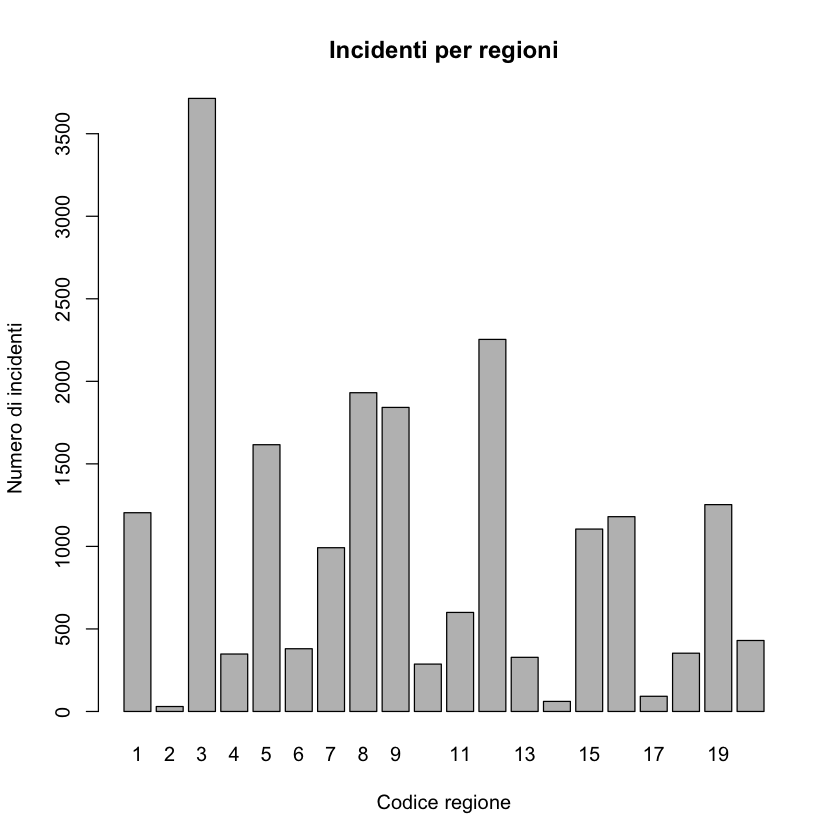

In [60]:
barplot(table(incidenti_per_regione), main="Incidenti per regioni", ylab="Numero di incidenti", xlab='Codice regione')

In [123]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [124]:
geo_regioni <- readOGR( 
  dsn= paste0("../../../Downloads/Limiti01012017_g/Reg01012017_g/") , 
  layer="Reg01012017_g_WGS84",
  verbose=FALSE
)

In [125]:
# Controllo che i codici delle regioni combacino
geo_regioni$COD_REG %in% incidenti_per_regione

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE

In [126]:
geo_regioni@data <- cbind(geo_regioni@data, as.array(table(incidenti_per_regione)/SAMPLE_SIZE))

drop <- c("incidenti_per_regione")
geo_regioni@data = geo_regioni@data[,!(names(geo_regioni@data) %in% drop)]

In [127]:
geo_regioni@data

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,Freq
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
0,1,1,Piemonte,1235676.2,25393876361,0.06205
1,1,2,Valle d'Aosta/Vallée d'Aoste,311139.3,3258906689,0.00090
2,1,3,Lombardia,1410509.0,23862231896,0.19010
3,2,4,Trentino-Alto Adige/Südtirol,800893.7,13607548177,0.01850
4,2,5,Veneto,1058649.9,18405751538,0.07930
5,2,6,Friuli-Venezia Giulia,669663.8,7863906353,0.02110
6,1,7,Liguria,825467.9,5415023333,0.04820
7,2,8,Emilia-Romagna,1163681.7,22450247101,0.09615
8,3,9,Toscana,1306388.9,22982447617,0.09320


In [128]:
dataset_pop <- read.csv("dataset/popolazione.csv", sep=',')
dataset_pop$X = geo_regioni$COD_REG

In [129]:
dataset_pop

X,Regione,Popolazione
<fct>,<fct>,<dbl>
1,Lombardia,10060574
2,Lazio,5879082
3,Campania,5801692
4,Sicilia,4999891
5,Veneto,4905854
6,Emilia-Romagna,4459477
7,Piemonte,4356406
8,Puglia,4029053
9,Toscana,3729641


In [130]:
levels(dataset_pop$Regione) == levels(geo_regioni$DEN_REG)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE

In [131]:
for(i in 1:length(geo_regioni$Freq))
{
        geo_regioni$Incidenti_per_100000_abitanti[i] =  100000 * geo_regioni$Freq[i] * nrow(dataset_proj) /  dataset_pop$Popolazione[which(dataset_pop$Regione == geo_regioni$DEN_REG[i])]
}

In [132]:
library(tmap)

In [1]:
qtm(geo_regioni, "Freq")

ERROR: Error in qtm(geo_regioni, "Freq"): could not find function "qtm"


Per completare questa analisi, mi manca solamente di dividere la frequenza relativa di incidenti per regione con la popolazione della suddetta regione.

* Devo un attimo capire come ottenere qualcosa del tipo "incidenti ogni 1000 abitanti".

     L'unico modo sarebbe quello di dividere le frequenze relative per la popolazione della regione e moltiplicare per il numero totale di incidenti in Italia. (Ho controllato e matematicamente è corretto)

Warning message:
“The shape geo_regioni is invalid. See sf::st_is_valid”

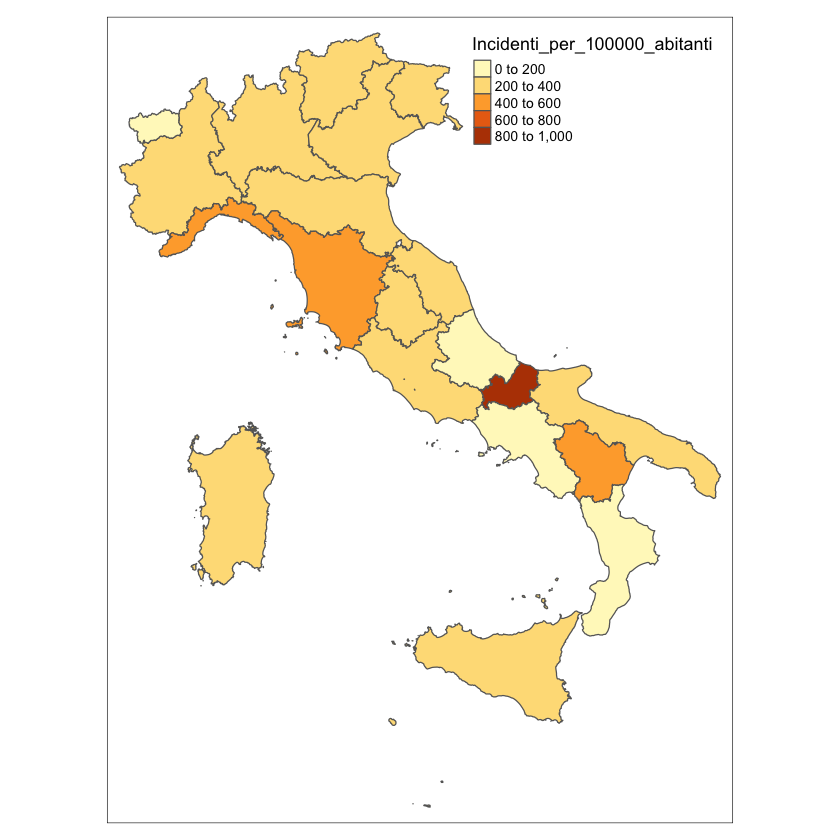

In [134]:
qtm(geo_regioni, "Incidenti_per_100000_abitanti")

In [137]:
dataset_pop

X,Regione,Popolazione,parco_veicolare
<fct>,<fct>,<dbl>,<dbl>
1,Lombardia,10060574,7850589
2,Lazio,5879082,4868938
3,Campania,5801692,4420628
4,Sicilia,4999891,4344556
5,Veneto,4905854,4002778
6,Emilia-Romagna,4459477,3789017
7,Piemonte,4356406,3777687
8,Puglia,4029053,2917885
9,Toscana,3729641,3381332


In [136]:
dataset_pop$parco_veicolare = c(7850589,4868938,4420628,4344556,4002778,3789017,3777687,2917885,3381332,1592866,1328799,1337699,1364973,1143937,1028446,1226089,814635,468788,280453,215315)

In [139]:
for(i in 1:length(geo_regioni$Freq))
{
        geo_regioni$Incidenti_per_100000_veicoli[i] =  100000 * geo_regioni$Freq[i] * nrow(dataset_proj) /  dataset_pop$parco_veicolare[which(dataset_pop$Regione == geo_regioni$DEN_REG[i])]
}

Warning message:
“The shape geo_regioni is invalid. See sf::st_is_valid”

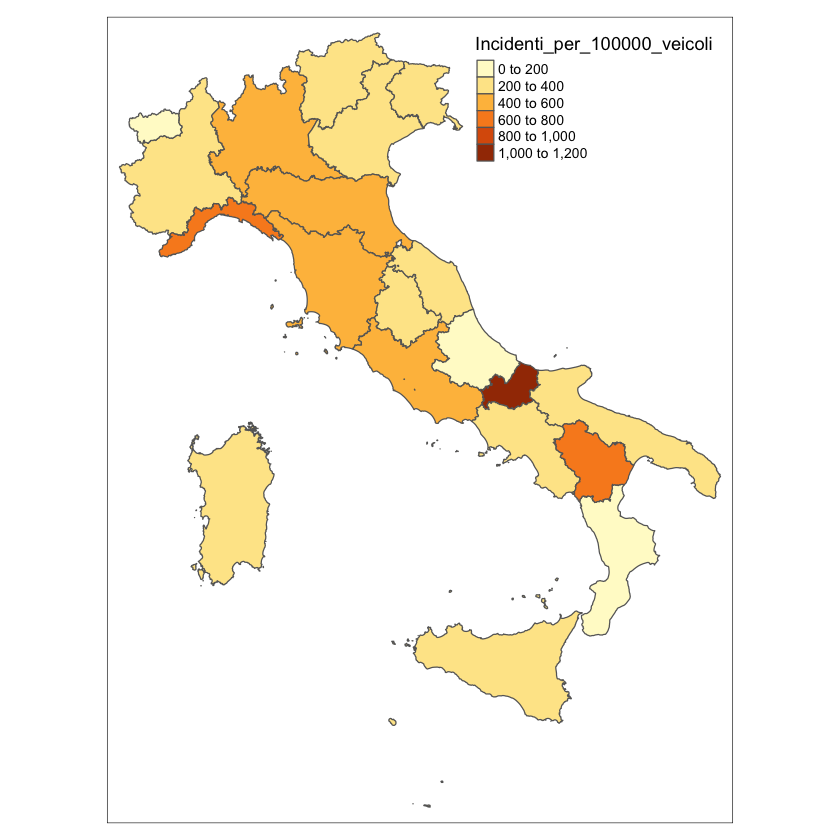

In [140]:
qtm(geo_regioni, "Incidenti_per_100000_veicoli")

----
----
----
----
----
----
----
----
----

## Persone che si schiantano da sole

Analizzo per vedere sesso ed età delle persone che si schiantano da sole, ovvero dove si è solamente un veicolo coinvolto nell'incidente.

Vado a prendere tutti quei casi in cui non risulta informazione su *veicolo b*, ovvero laddove si ha `tipo_veicoli__b_ = <NA>`.

Per ora non faccio analisi campionaria, ma prendo direttamente tutta la popolazione, per pura comodità (sono comunque pochi).

In [86]:
tipo_veicoli__b_[is.na(tipo_veicoli__b_)] <- 666

In [88]:
tipo_veicoli__b_[is.na(tipo_veicoli__b_)] <- 666
schianto_da_soli = dataset_proj[which(tipo_veicoli__b_ == 666),]

In [89]:
nrow(schianto_da_soli)

[1] 5557

In [91]:
# Sostituisco i Nan con dei 3
schianto_da_soli$veicolo__a___sesso_conducente[is.na(schianto_da_soli$veicolo__a___sesso_conducente)] <- 3

In [92]:
schianto_da_soli$veicolo__a___sesso_conducente <- factor(schianto_da_soli$veicolo__a___sesso_conducente)
levels(schianto_da_soli$veicolo__a___sesso_conducente) <- c("Maschio", "Femmina","Sconosciuto")

In [93]:
tabella_schianto_da_soli_sesso = table(schianto_da_soli$veicolo__a___sesso_conducente)
tabella_schianto_da_soli_sesso


    Maschio     Femmina Sconosciuto 
       4177        1357          23 

[1] 5557

In [97]:
# Calcolo frequenze
tabella_schianto_da_soli_sesso.relfreq <- tabella_schianto_da_soli_sesso/length(schianto_da_soli$veicolo__a___sesso_conducente)
tabella_schianto_da_soli_sesso.percfreq <- tabella_schianto_da_soli_sesso.relfreq*100

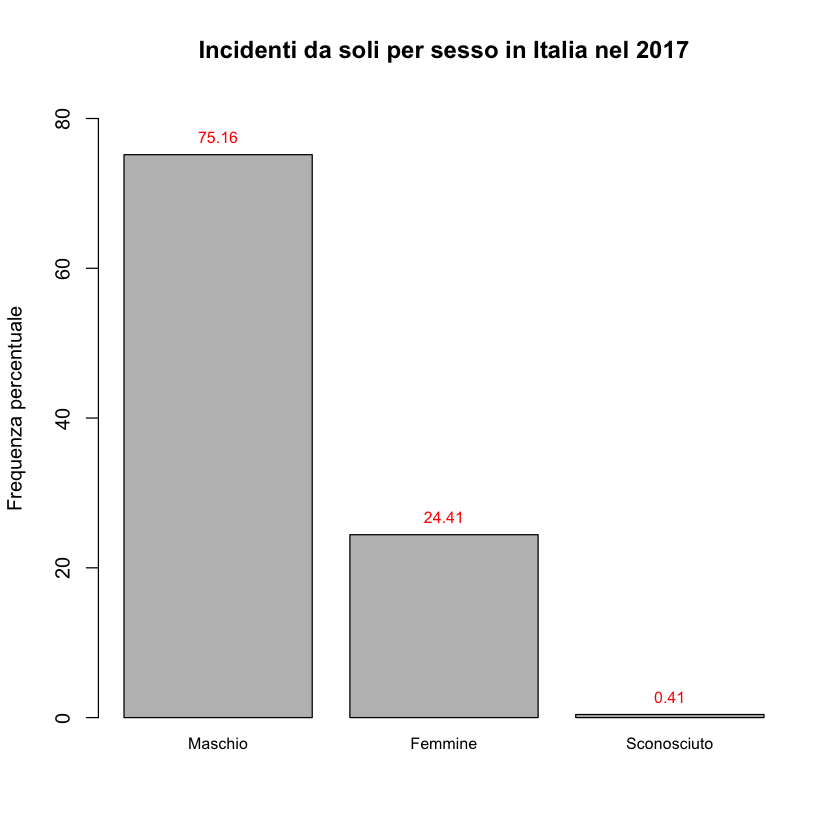

In [105]:
ylim <- c(0, 1.1*max(tabella_schianto_da_soli_sesso.percfreq))
xx <- barplot(tabella_schianto_da_soli_sesso.percfreq, xaxt = 'n', xlab = '', width = 0.85, ylim = ylim,
              main = "Incidenti da soli per sesso in Italia nel 2017", 
              ylab = "Frequenza percentuale")
text(x = xx, y = tabella_schianto_da_soli_sesso.percfreq,
     label = as.integer(tabella_schianto_da_soli_sesso.percfreq*100)/100,
     pos = 3, cex = 0.8, col = "red")
axis(1, at=xx, labels=c("Maschio", "Femmine", "Sconosciuto"), tick=FALSE, las=1, line=-0.5, cex.axis=0.8)

Questo risultato deve essere pesato sul numero di patenti in Italia. 